In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [45]:
apt21 = pd.read_csv('data/아파트(전월세)_실거래가_2021.csv', header=15, encoding='cp949')
apt22 = pd.read_csv('data/아파트(전월세)_실거래가_2022.csv', header=15, encoding='cp949')
apt23 = pd.read_csv('data/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_2784\2638666978.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  apt21 = pd.read_csv('data/아파트(전월세)_실거래가_2021.csv', header=15, encoding='cp949')
C:\Users\emily\AppData\Local\Temp\ipykernel_2784\2638666978.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  apt22 = pd.read_csv('data/아파트(전월세)_실거래가_2022.csv', header=15, encoding='cp949')


In [63]:
apt21_deal = pd.read_csv('data/아파트(매매)_실거래가_2021.csv', header=15, encoding='cp949')
apt22_deal = pd.read_csv('data/아파트(매매)_실거래가_2022.csv', header=15, encoding='cp949')
apt23_deal = pd.read_csv('data/아파트(매매)_실거래가_2023.csv', header=15, encoding='cp949')

In [15]:
apt21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227699 entries, 0 to 227698
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NO            227699 non-null  int64  
 1   시군구           227699 non-null  object 
 2   번지            227699 non-null  object 
 3   본번            227699 non-null  int64  
 4   부번            227699 non-null  int64  
 5   단지명           227699 non-null  object 
 6   전월세구분         227699 non-null  object 
 7   전용면적(㎡)       227699 non-null  float64
 8   계약년월          227699 non-null  int64  
 9   계약일           227699 non-null  int64  
 10  보증금(만원)       227699 non-null  object 
 11  월세금(만원)       227699 non-null  object 
 12  층             227699 non-null  int64  
 13  건축년도          227699 non-null  int64  
 14  도로명           227699 non-null  object 
 15  계약기간          227699 non-null  object 
 16  계약구분          227699 non-null  object 
 17  갱신요구권 사용      227699 non-null  object 
 18  종전계약

In [54]:
apt21_deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43390 entries, 0 to 43389
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        43390 non-null  int64  
 1   시군구       43390 non-null  object 
 2   번지        43390 non-null  object 
 3   본번        43390 non-null  int64  
 4   부번        43390 non-null  int64  
 5   단지명       43390 non-null  object 
 6   전용면적(㎡)   43390 non-null  float64
 7   계약년월      43390 non-null  int64  
 8   계약일       43390 non-null  int64  
 9   거래금액(만원)  43390 non-null  object 
 10  동         43390 non-null  object 
 11  층         43390 non-null  int64  
 12  매수자       43390 non-null  object 
 13  매도자       43390 non-null  object 
 14  건축년도      43390 non-null  int64  
 15  도로명       43390 non-null  object 
 16  해제사유발생일   43390 non-null  object 
 17  거래유형      43390 non-null  object 
 18  중개사소재지    43390 non-null  object 
 19  등기일자      43390 non-null  object 
dtypes: float64(1), int64(7), obj

In [46]:
apt21['보증금(만원)'] = apt21['보증금(만원)'].str.replace(',', '').astype(int)
apt21['월세금(만원)'] = apt21['월세금(만원)'].str.replace(',', '').astype(int)

In [58]:
apt21_deal['거래금액(만원)'] 

0         22,300
1        175,000
2         12,500
3         98,600
4         22,500
          ...   
43385     77,000
43386     68,000
43387     68,000
43388     24,300
43389     87,500
Name: 거래금액(만원), Length: 43390, dtype: object

In [64]:
apt21_deal['거래금액(만원)'] = apt21_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt22_deal['거래금액(만원)'] = apt22_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt23_deal['거래금액(만원)'] = apt23_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [74]:
apt21_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
count,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,4.339000e+04,43390.000000,43390.000000
mean,21695.500000,593.198248,8.525190,73.512272,202105.421318,15.655520,1.026945e+05,9.152662,2001.850288
std,12525.758427,539.989475,63.749218,33.013821,3.089755,8.780965,7.507025e+04,6.256527,10.388964
min,1.000000,1.000000,0.000000,10.156000,202101.000000,1.000000,6.600000e+03,-1.000000,1961.000000
25%,10848.250000,205.000000,0.000000,58.140000,202103.000000,8.000000,5.880000e+04,4.000000,1995.000000
50%,21695.500000,492.000000,0.000000,70.645000,202105.000000,16.000000,8.470000e+04,8.000000,2002.000000
75%,32542.750000,810.000000,1.000000,84.950000,202108.000000,23.000000,1.275000e+05,13.000000,2009.000000
max,43390.000000,4969.000000,2837.000000,317.360000,202112.000000,31.000000,1.200000e+06,66.000000,2022.000000


In [78]:
apt21_deal['거래금액(만원)'].describe()

count    4.339000e+04
mean     1.026945e+05
std      7.507025e+04
min      6.600000e+03
25%      5.880000e+04
50%      8.470000e+04
75%      1.275000e+05
max      1.200000e+06
Name: 거래금액(만원), dtype: float64

In [79]:
apt22_deal['거래금액(만원)'].describe()

count    1.279900e+04
mean     9.715524e+04
std      9.462162e+04
min      6.700000e+03
25%      3.900000e+04
50%      7.400000e+04
75%      1.200000e+05
max      1.450000e+06
Name: 거래금액(만원), dtype: float64

In [80]:
apt23_deal['거래금액(만원)'].describe()

count    3.565800e+04
mean     1.064337e+05
std      7.797207e+04
min      7.400000e+03
25%      6.000000e+04
50%      8.700000e+04
75%      1.295000e+05
max      1.800000e+06
Name: 거래금액(만원), dtype: float64

In [77]:
apt23_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
count,35658.000000,35658.000000,35658.000000,35658.000000,35658.000000,35658.000000,3.565800e+04,35658.000000,35658.000000
mean,17829.500000,621.030316,5.131527,74.399964,202306.439593,15.718885,1.064337e+05,9.940883,2003.618963
std,10293.722286,619.412900,46.927183,30.342781,3.006506,8.570670,7.797207e+04,6.583783,11.467822
min,1.000000,1.000000,0.000000,10.780000,202301.000000,1.000000,7.400000e+03,-3.000000,1961.000000
25%,8915.250000,226.000000,0.000000,59.580000,202304.000000,8.000000,6.000000e+04,5.000000,1996.000000
50%,17829.500000,505.000000,0.000000,74.660000,202306.000000,16.000000,8.700000e+04,9.000000,2003.000000
75%,26743.750000,821.000000,0.000000,84.960000,202309.000000,23.000000,1.295000e+05,14.000000,2014.000000
max,35658.000000,4974.000000,2837.000000,309.700000,202312.000000,31.000000,1.800000e+06,68.000000,2023.000000


- 21년 거래 건수: 43,390건  /  평균 거래가 : 102,694.5만원 (10.3억 원)
- 22년 거래 건수: 12,799건  /  평균 거래가 : 97,155만원 (약 9.7억 원)
- 23년 거래 건수: 35,658건  /  평균 거래가 : 106,433만원 (약 10.6억)

In [48]:
apt21.isnull().sum()

NO                   0
시군구                  0
번지                   0
본번                   0
부번                   0
단지명                  0
전월세구분                0
전용면적(㎡)              0
계약년월                 0
계약일                  0
보증금(만원)              0
월세금(만원)              0
층                    0
건축년도                 0
도로명                  0
계약기간                 0
계약구분                 0
갱신요구권 사용             0
종전계약 보증금(만원)    188800
종전계약 월세(만원)     188800
주택유형                 0
dtype: int64

In [49]:
apt21.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도
count,227699.00000,227699.000000,227699.000000,227699.000000,227699.000000,227699.000000,227699.000000,227699.000000,227699.000000,227699.000000
mean,113850.00000,614.938252,4.740912,69.868588,202106.890030,15.955577,41336.058200,35.768493,9.322360,2003.515325
std,65731.18381,582.623946,38.198595,29.491477,3.443127,8.589888,36431.917861,77.698075,6.275606,12.089477
min,1.00000,0.000000,0.000000,10.780000,202101.000000,1.000000,0.000000,0.000000,-3.000000,1961.000000
25%,56925.50000,226.000000,0.000000,50.380000,202104.000000,9.000000,13500.000000,0.000000,4.000000,1994.000000
50%,113850.00000,512.000000,0.000000,59.990000,202107.000000,16.000000,35000.000000,0.000000,8.000000,2004.000000
75%,170774.50000,831.000000,0.000000,84.920500,202110.000000,23.000000,58000.000000,45.000000,13.000000,2014.000000
max,227699.00000,4972.000000,2837.000000,301.470000,202112.000000,31.000000,950000.000000,3000.000000,69.000000,2024.000000


In [50]:
apt21_df = apt21[(apt21['보증금(만원)']!=0)&(apt21['월세금(만원)']!=0)]
apt21_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
3,4,서울특별시 용산구 이촌동,301-170,301,170,반도,월세,197.4600,202112,31,...,140,12,1977,이촌로 324-10,202203~202403,신규,-,NaN,NaN,아파트
7,8,서울특별시 성동구 옥수동,528,528,0,옥수파크힐스101동~116동,월세,84.3000,202112,31,...,180,2,2016,매봉길 50,202203~202212,갱신,-,"40,000",130,아파트
10,11,서울특별시 중구 만리동2가,273,273,0,서울역센트럴자이,월세,72.9932,202112,31,...,150,6,2017,만리재로 175,202202~202402,신규,-,NaN,NaN,아파트
13,14,서울특별시 중구 신당동,844,844,0,남산타운(임대),월세,32.7600,202112,31,...,6,14,2002,다산로 32,-,-,-,NaN,NaN,아파트
16,17,서울특별시 용산구 이촌동,415,415,0,한강(대우),월세,84.9800,202112,31,...,350,19,2000,이촌로 181,202202~202402,신규,-,NaN,NaN,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227691,227692,서울특별시 구로구 천왕동,274,274,0,천왕이펜하우스7단지,월세,29.9600,202101,1,...,5,6,2017,천왕로 21,-,-,-,NaN,NaN,아파트
227692,227693,서울특별시 구로구 구로동,98-10,98,10,비즈트위트그린,월세,15.1100,202101,1,...,35,16,2012,구로중앙로18길 23,-,-,-,NaN,NaN,아파트
227694,227695,서울특별시 관악구 신림동,1735-2,1735,2,관악산휴먼시아3단지,월세,39.8200,202101,1,...,12,9,2008,난곡로 63,-,-,-,NaN,NaN,아파트
227697,227698,서울특별시 강동구 고덕동,210-1,210,1,고덕센트럴푸르지오,월세,40.0900,202101,1,...,15,21,2020,고덕로 399,-,-,-,NaN,NaN,아파트


In [51]:
apt21_df.isnull().sum()

NO                  0
시군구                 0
번지                  0
본번                  0
부번                  0
단지명                 0
전월세구분               0
전용면적(㎡)             0
계약년월                0
계약일                 0
보증금(만원)             0
월세금(만원)             0
층                   0
건축년도                0
도로명                 0
계약기간                0
계약구분                0
갱신요구권 사용            0
종전계약 보증금(만원)    79798
종전계약 월세(만원)     79798
주택유형                0
dtype: int64

In [42]:
apt21_df.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도
count,227441.000000,227441.000000,227441.000000,227441.000000,227441.000000,227441.000000,227441.000000,227441.00000,227441.000000,227441.000000
mean,113873.207188,614.771009,4.737593,69.837196,202106.888705,15.957101,41382.948176,35.43267,9.321714,2003.514107
std,65742.924612,582.529314,38.205296,29.446934,3.443823,8.588823,36425.949684,76.50896,6.274219,12.092528
min,1.000000,0.000000,0.000000,10.780000,202101.000000,1.000000,1.000000,0.00000,-3.000000,1961.000000
25%,56930.000000,226.000000,0.000000,50.370000,202104.000000,9.000000,13640.000000,0.00000,4.000000,1994.000000
50%,113881.000000,512.000000,0.000000,59.990000,202107.000000,16.000000,35000.000000,0.00000,8.000000,2004.000000
75%,170826.000000,830.000000,0.000000,84.920000,202110.000000,23.000000,58000.000000,45.00000,13.000000,2014.000000
max,227699.000000,4972.000000,2837.000000,301.470000,202112.000000,31.000000,950000.000000,3000.00000,69.000000,2024.000000


<Axes: >

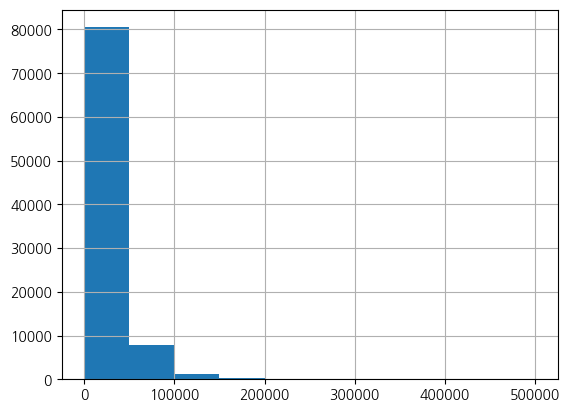

In [52]:
apt21_df['보증금(만원)'].hist()